In [74]:
#@title Default title text
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


First Check for GPU backend

Run the following cell only first time, later you can remove the cell once keras has been installed

In [0]:
!pip install -q keras

# Import the necessary libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, BatchNormalization, AveragePooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from keras.datasets import mnist
%matplotlib inline

# Load the data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


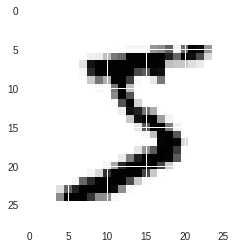

In [42]:
print(X_train.shape)
plt.imshow(X_train[0])

# Reshape the data and scale it to 255

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [46]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
train_gen = ImageDataGenerator(
        rotation_range=8,
        width_shift_range=0.08,
        height_shift_range=0.08,
        zoom_range=0.08)

In [0]:
train_generator = train_gen.flow(X_train, Y_train, batch_size=512)
test_generator = ImageDataGenerator().flow(X_test, Y_test, batch_size=512)

# Build the model

In [0]:
model = Sequential()

 
model.add(Convolution2D(5, (7, 7),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(5, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Convolution2D(10, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 5)         250       
_________________________________________________________________
batch_normalization_59 (Batc (None, 28, 28, 5)         20        
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 24, 24, 5)         630       
_________________________________________________________________
batch_normalization_60 (Batc (None, 24, 24, 5)         20        
_________________________________________________________________
average_pooling2d_20 (Averag (None, 12, 12, 5)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 10, 10, 10)        460       
__________

In [0]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [54]:
# model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=10, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/10
937/937 [==============================] - 154s 164ms/step - loss: 0.3451 - acc: 0.8916 - val_loss: 0.0507 - val_acc: 0.9822
Epoch 2/10
 68/937 [=>............................] - ETA: 2:00 - loss: 0.1486 - acc: 0.9521

937/937 [==============================] - 148s 158ms/step - loss: 0.1281 - acc: 0.9600 - val_loss: 0.0331 - val_acc: 0.9887
Epoch 3/10
144/937 [===>..........................] - ETA: 1:52 - loss: 0.1109 - acc: 0.9648

937/937 [==============================] - 145s 154ms/step - loss: 0.1039 - acc: 0.9674 - val_loss: 0.0312 - val_acc: 0.9884
Epoch 4/10
173/937 [====>.........................] - ETA: 1:48 - loss: 0.0996 - acc: 0.9689

937/937 [==============================] - 148s 158ms/step - loss: 0.0956 - acc: 0.9700 - val_loss: 0.0315 - val_acc: 0.9885
Epoch 5/10
183/937 [====>.........................] - ETA: 1:51 - loss: 0.0936 - acc: 0.9708

937/937 [==============================] - 148s 158ms/step - loss: 0.0902 - acc: 0.9719 - val_loss: 0.0316 - val_acc: 0.9888
Epoch 6/10
187/937 [====>.........................] - ETA: 1:50 - loss: 0.0876 - acc: 0.9723

937/937 [==============================] - 150s 160ms/step - loss: 0.0862 - acc: 0.9728 - val_loss: 0.0400 - val_acc: 0.9857
Epoch 7/10
185/937 [====>.........................] - ETA: 1:53 - loss: 0.0841 - acc: 0.9743

937/937 [==============================] - 148s 158ms/step - loss: 0.0838 - acc: 0.9740 - val_loss: 0.0288 - val_acc: 0.9904
Epoch 8/10
185/937 [====>.........................] - ETA: 1:48 - loss: 0.0813 - acc: 0.9742

937/937 [==============================] - 146s 155ms/step - loss: 0.0809 - acc: 0.9748 - val_loss: 0.0273 - val_acc: 0.9902
Epoch 9/10
188/937 [=====>........................] - ETA: 1:46 - loss: 0.0789 - acc: 0.9754

937/937 [==============================] - 146s 156ms/step - loss: 0.0795 - acc: 0.9753 - val_loss: 0.0294 - val_acc: 0.9893
Epoch 10/10
190/937 [=====>........................] - ETA: 1:48 - loss: 0.0795 - acc: 0.9757

937/937 [==============================] - 146s 156ms/step - loss: 0.0784 - acc: 0.9756 - val_loss: 0.0248 - val_acc: 0.9917


In [57]:
score = model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 138us/step


In [58]:
score

[0.024800974605418743, 0.9917]

In [0]:
y_pred = model.predict(X_test)

In [60]:
y_pred[:9]

array([[3.2876979e-09, 1.1106733e-07, 1.0593239e-05, 1.2855716e-06,
        2.8898239e-09, 5.8725709e-09, 4.1818606e-12, 9.9997997e-01,
        3.0947646e-08, 7.9544552e-06],
       [1.7617953e-05, 4.6877952e-07, 9.9995160e-01, 4.1431576e-06,
        1.4426624e-08, 1.5427154e-10, 1.9272426e-07, 3.7123922e-09,
        2.5891404e-05, 2.7365385e-08],
       [1.3312573e-06, 9.9997509e-01, 1.3799698e-07, 5.8399920e-09,
        1.2739664e-05, 5.5163747e-07, 7.0768385e-07, 8.3427649e-06,
        2.5308328e-08, 1.1132282e-06],
       [9.7925574e-01, 2.0818158e-09, 2.1029748e-06, 2.4377619e-07,
        5.6284801e-08, 4.8093661e-06, 2.0647243e-02, 3.1627561e-09,
        8.7957298e-05, 1.9546103e-06],
       [8.1091240e-09, 9.8199560e-10, 7.9930027e-09, 1.9155643e-12,
        9.9991775e-01, 4.6591547e-10, 9.1049551e-10, 2.9682004e-10,
        3.4971566e-09, 8.2232626e-05],
       [3.4772964e-07, 9.9998939e-01, 6.8650124e-08, 5.3367189e-11,
        4.4635167e-06, 9.6287316e-09, 3.1532684e-07, 5.15

In [61]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [0]:
layer_dict = dict([(layer.name,layer) for layer in model.layers])

In [66]:
layer_dict

{'activation_12': <keras.layers.core.Activation at 0x7ff18c2bf9b0>,
 'average_pooling2d_20': <keras.layers.pooling.AveragePooling2D at 0x7ff18cee0cc0>,
 'average_pooling2d_21': <keras.layers.pooling.AveragePooling2D at 0x7ff18ccdbd68>,
 'batch_normalization_59': <keras.layers.normalization.BatchNormalization at 0x7ff18cf068d0>,
 'batch_normalization_60': <keras.layers.normalization.BatchNormalization at 0x7ff18cf18320>,
 'batch_normalization_61': <keras.layers.normalization.BatchNormalization at 0x7ff18ce796d8>,
 'batch_normalization_62': <keras.layers.normalization.BatchNormalization at 0x7ff18cd58fd0>,
 'conv2d_66': <keras.layers.convolutional.Conv2D at 0x7ff18cf5a240>,
 'conv2d_67': <keras.layers.convolutional.Conv2D at 0x7ff18cf06c18>,
 'conv2d_68': <keras.layers.convolutional.Conv2D at 0x7ff18ce21e48>,
 'conv2d_69': <keras.layers.convolutional.Conv2D at 0x7ff18cd58eb8>,
 'conv2d_70': <keras.layers.convolutional.Conv2D at 0x7ff18cbbb160>,
 'dropout_10': <keras.layers.core.Dropout a

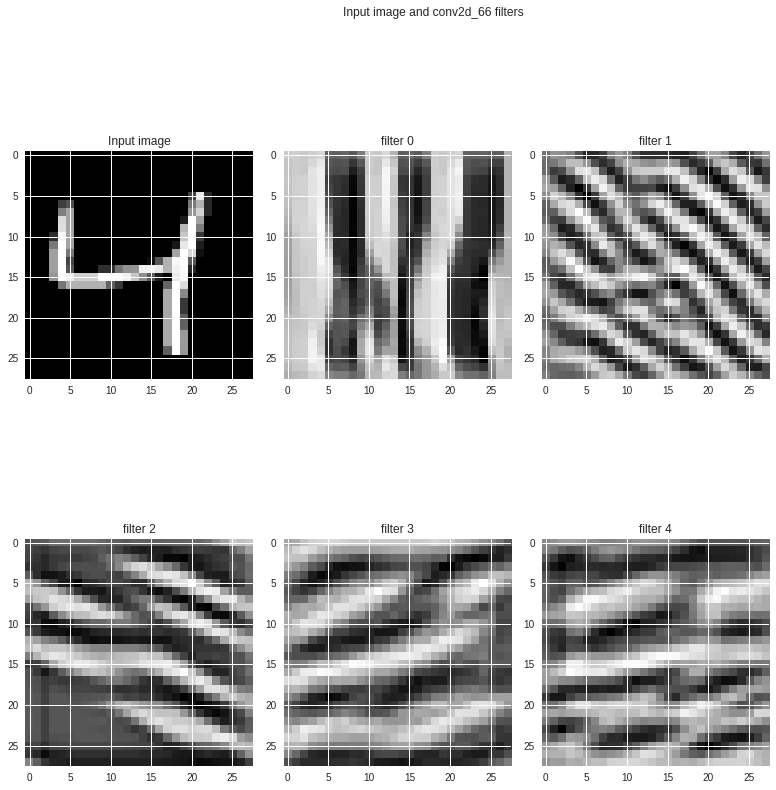

In [80]:
from keras import backend as K

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_66'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        
        
        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
     
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 2, 3 # Depending on the number of filters used change this numbers or you will get error or empty subplots
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape(28, 28), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()